In [1]:
import sys
sys.path.insert(0, '/home/niell_lab/Documents/github/FreelyMovingEphys/')
import pandas as pd
import xarray as xr
from population_utils import *

In [2]:
df = pd.read_pickle('/home/niell_lab/data/freely_moving_ephys/batch_files/090321/pooled_ephys_unit_update_090721.pickle')

In [3]:
df1 = make_population_summary(df, '/home/niell_lab/data/freely_moving_ephys/batch_files/090321/')

opening pdf
labeling by waveform
kmeans
depth plot
panels of osi vs variable
firing rate by stim
clustering waveforms
plotting clusters
relabeling based on peak finding
plotting histograms of cluster depths
plotting boxplots of cluster properties
matrix of cluster changes between movement types
clustering waveforms
plotting clusters
relabeling based on peak finding
plotting histograms of cluster depths
plotting boxplots of cluster properties
matrix of cluster changes between movement types
dhead and deye around time of gaze shifting eye movements


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.89s/it]


dhead and deye around time of compesatory eye movements


100%|███████████████████████████████████████████| 10/10 [00:24<00:00,  2.46s/it]


dhead and deye around time of gaze shifting head movements


100%|███████████████████████████████████████████| 10/10 [00:30<00:00,  3.06s/it]


dhead and deye around time of compensatory head movements


100%|███████████████████████████████████████████| 10/10 [00:25<00:00,  2.52s/it]


saving population summary pdf
done


In [5]:
np.sum(pd.isnull(df1['hf3_gratings_drift_spont']))

50

In [6]:
np.sum(pd.isnull(df1['hf3_gratings_evoked_rate']))

50

In [15]:
np.sum(~pd.isnull(df1['hf3_gratings_evoked_rate']) & ~pd.isnull(df1['hf3_gratings_drift_spont']) & ~pd.isnull(df1['hf1_wn_depth_from_layer5']))

395

(-5, 30)

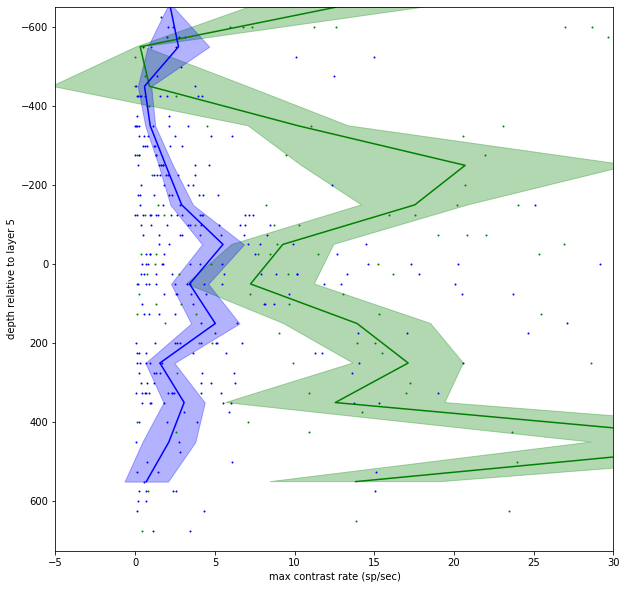

In [13]:
depth_range = [np.max(df1['hf1_wn_depth_from_layer5'][df1['responsive_to_contrast']==True])+50, np.min(df1['hf1_wn_depth_from_layer5'][df1['responsive_to_contrast']==True])+50]
force_range = np.arange(-650,750,100)
plt.subplots(1,1, figsize=(10,10))
plt.ylabel('depth relative to layer 5'); plt.xlabel('max contrast rate (sp/sec)')
plt.plot(df1['hf1_wn_max_contrast_rate'][df1['waveform_km_label']==0], df1['hf1_wn_depth_from_layer5'][df1['waveform_km_label']==0], 'g.', markersize=2)
plt.plot(df1['hf1_wn_max_contrast_rate'][df1['waveform_km_label']==1], df1['hf1_wn_depth_from_layer5'][df1['waveform_km_label']==1], 'b.', markersize=2); plt.ylim(depth_range)
stat2use = 'median'
for count in range(2):
    x = df1['hf1_wn_max_contrast_rate'][df1['waveform_km_label']==count]
    y = df1['hf1_wn_depth_from_layer5'][df1['waveform_km_label']==count]
    c = ['g','b'][count]
    bin_means, bin_edges, bin_number = stats.binned_statistic(y[~np.isnan(x) & ~np.isnan(y)], x[~np.isnan(x) & ~np.isnan(y)], statistic=stat2use, bins=force_range)
    bin_std, _, _ = stats.binned_statistic(y[~np.isnan(x) & ~np.isnan(y)], x[~np.isnan(x) & ~np.isnan(y)], statistic='std', bins=force_range)
    hist, _ = np.histogram(y[~np.isnan(x) & ~np.isnan(y)], bins=force_range)
    tuning_err = bin_std / np.sqrt(hist)
    plt.plot(bin_means, bin_edges[:-1], c+'-')
    plt.fill_betweenx(bin_edges[:-1], bin_means-tuning_err, bin_means+tuning_err, color=c, alpha=0.3)
plt.xlim([-5,30])
# plt.title('pts in data='+str(len_without_nan([crfs0[:,-1], crfs1[:,-1]])))

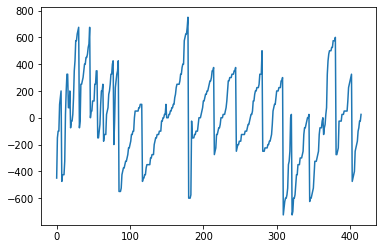

In [4]:
plt.plot(df['hf1_wn_depth_from_layer5'])

In [ ]:
len(~pd.isnull(df1['dsi_for_sf_pref'])[df1['responsive_to_gratings']==True])

In [ ]:
len(~pd.isnull(df1['osi_for_sf_pref'])[df1['responsive_to_gratings']==True])

In [ ]:
len(~pd.isnull(df1['hf1_wn_spont_rate']))

In [ ]:
df1.index.values

In [ ]:
plt.plot(df1['hf1_wn_max_contrast_rate'])

In [ ]:
plt.plot(df1['hf1_wn_depth_from_layer5'])
plt.xlim([0,80])

In [ ]:
plt.plot(np.diff(df1.index.values))

In [ ]:
df2 = df1.copy()

In [ ]:
df2 = df2.drop('level_0',axis=1).reset_index()

In [ ]:
plt.plot(df2['hf1_wn_depth_from_layer5'])

In [ ]:
plt.plot(df2['ch'])

In [ ]:
df1['hf1_wn_max_contrast_rate']

In [ ]:
print('total'len(df1))
print('responsive', len(df1[df1['responsive_to_contrast']==True]))
print('responsive and not nan', len(df1[~pd.isnull(df1['hf1_wn_crf_modind'])][df1['responsive_to_contrast']==True]))
print('not nan', len(df1[~pd.isnull(df1['hf1_wn_crf_modind'])]))
print('responsive and not nan and has depth', len(df1[~pd.isnull(df1['hf1_wn_depth_from_layer5'])][~pd.isnull(df1['hf1_wn_crf_modind'])][df1['responsive_to_contrast']==True]))

In [ ]:
from scipy import ndimage as ndi
from skimage import measure
import skimage

In [ ]:
for unit_ind in range(len(df1)):
    plt.subplots(1,3, figsize=(10,20))
    plt.subplot(1,3,1)
    sta = np.reshape(df1.loc[unit_ind,'hf1_wn_spike_triggered_average'],tuple(df1.loc[unit_ind,'hf1_wn_sta_shape']))
    starange = np.max(np.abs(sta))*1.2
    plt.imshow(sta, vmin=-starange, vmax=starange, cmap='seismic')

    plt.subplot(1,3,2)
    STAnorm = sta/np.max(np.abs(sta))
    zscored_img = (STAnorm / np.nanstd(STAnorm))
    on_regions = STAnorm.copy(); off_regions = STAnorm.copy();
    on_regions[zscored_img < 2] = 0
    off_regions[zscored_img > -2] = 0
    on_mask = skimage.measure.label(on_regions, connectivity=1, background=0, return_num=False)
    off_mask = skimage.measure.label(off_regions, connectivity=1, background=0, return_num=False)
    masks = [on_mask, off_mask]
    on_count = 0
    off_count = 0
    for mask_ind in range(2):
        labeled_mask = masks[mask_ind]
        regions = skimage.measure.regionprops(labeled_mask)
        out_label = ['on','off'][mask_ind]
        for prop in regions: # remove some regions
            if any([prop.area < 7, prop.major_axis_length < 2]):
                image = ~prop.image
                (y_start, x_start, y_end, x_end) = prop.bbox
                labeled_mask[y_start:y_end, x_start:x_end] = np.multiply(labeled_mask[y_start:y_end, x_start:x_end], image)
        if out_label == 'on':
            on = labeled_mask
            on_count = len(skimage.measure.regionprops(on))
        elif out_label == 'off':
            off = labeled_mask
            off_count = len(skimage.measure.regionprops(off))
    plt.imshow(on, vmin=-1,vmax=1,cmap='seismic')
    plt.title('on= '+str(on_count))
    plt.subplot(1,3,3)
    plt.imshow(off, vmin=-1,vmax=1,cmap='seismic')
    plt.title('off= '+str(off_count))
    plt.show()

In [ ]:
plt.hist(zscored_img.flatten(), bins=25)

In [ ]:
plt.imshow(on_regions)

In [ ]:
for prop in [i for i in skimage.measure.regionprops(skimage.measure.label(on_regions, connectivity=2, background=0, return_num=False)) if i.area > 30]:
    print(prop.area)

In [ ]:
off_count

In [ ]:
unit_ind = 0
plt.subplots(2,4, figsize=(15,8))
plt.subplot(2,4,1)
sta = np.reshape(df1.loc[unit_ind,'hf1_wn_spike_triggered_average'],tuple(df1.loc[unit_ind,'hf1_wn_sta_shape']))
starange = np.max(np.abs(sta))*1.2
plt.imshow(sta, vmin=-starange, vmax=starange, cmap='seismic')
on_regions = sta > (np.max(sta)*0.5)
off_regions = sta < (np.min(sta)*0.5)
localmax = ndi.maximum_filter(on_regions, size=3)
localmin = ndi.maximum_filter(off_regions, size=3)
arrs = [localmax, localmin]
count = 1
for i in range(2):
    count += 1
    arr = arrs[i]
    l = ['on','off'][i]
    labeled_mask = skimage.measure.label(arr, connectivity=1, background=0, return_num=False)
    regions = skimage.measure.regionprops(labeled_mask)
    plt.subplot(2,4,count)
    areas = []
    lengths = []
    for prop in regions:
        areas.append(prop.area)
        lengths.append(prop.major_axis_length)
    plt.title(l+' area')
    plt.hist(areas)
    count += 1
    plt.subplot(2,4,count)
    plt.title(l+' major axis')
    plt.hist(lengths)
    for prop in regions: # remove some regions
        if any([prop.area < 40, prop.major_axis_length < 10]):
            image = ~prop.image
            (y_start, x_start, y_end, x_end) = prop.bbox
            labeled_mask[y_start:y_end, x_start:x_end] = np.multiply(labeled_mask[y_start:y_end, x_start:x_end], image)
    plt.subplot(2,4,count)
    plt.title(l)
    plt.imshow(labeled_mask)
    count += 1